In [62]:
import numpy as np
import os
from skimage.transform import resize, rescale
from skimage.io import imread
from matplotlib import pyplot as plt
import pickle
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [63]:
#dataset 
melanoma = '../Downloads/dataset_isic/melanoma/'
others = '../Downloads/dataset_isic/others/'
gt = '../Downloads/dataset_isic/gt/'
mel_names = []
oth_names = []
gt_names = []
for files in os.listdir(melanoma):
    files = files.split('.')
    mel_names.append(files[0])
    
for files in os.listdir(others):
    files = files.split('.')
    oth_names.append(files[0])

In [64]:
#labeling the dataset
mel_labelled = {x : 1 for x in mel_names}
oth_labelled = {x : 0 for x in oth_names}

#creating a new dictionary to store both
mel_oth_labelled = {}
mel_oth_labelled.update(mel_labelled)
mel_oth_labelled.update(oth_labelled)

In [66]:
#loading the dataset of 2000 images in chronological order of images in segmentation and mel_oth
dataset_x = []
dataset_y = []
dataset_seg = []
for x in mel_names:
    img = resize(imread(melanoma + x + '.jpg').astype(np.uint8), (64, 64))
    img_seg = resize(imread(gt + x + '_segmentation.png').astype(np.uint8), (64, 64))
    img_label = mel_oth_labelled.get(x)
    dataset_y.append(img_label)
    dataset_x.append(img)
    dataset_seg.append(img_seg)

for x in oth_names:
    img = resize(imread(others + x + '.jpg').astype(np.uint8), (64, 64))
    img_seg = resize(imread(gt + x + '_segmentation.png').astype(np.uint8), (64, 64))
    img_label = mel_oth_labelled.get(x)
    dataset_y.append(img_label)
    dataset_x.append(img)
    dataset_seg.append(img_seg)

In [67]:
np.unique(dataset_seg[100])

array([0.        , 0.01367188, 0.0859375 , 0.13085938, 0.1640625 ,
       0.46679687, 0.56054688, 0.60351563, 0.75      , 0.75      ,
       0.75195312, 0.77148438, 0.8515625 , 0.86523437, 0.90820312,
       0.93164062, 1.        ])

In [68]:
#thresholding segmented/ground truth image
for x in dataset_seg:
    x[x >= 0.5] = 1
    x[x < 0.5] = 0

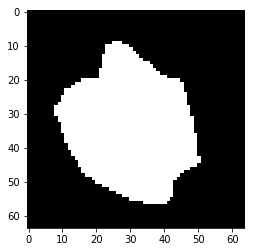

In [69]:
plt.imshow(dataset_seg[0], cmap='gray')

In [70]:
np.unique(dataset_seg[0])

array([0., 1.])

In [71]:
dataset_seg[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [72]:
#defining hadamard product on gt and mel_oth images
def segment_images(seg, img):
        shape = seg.shape
        for i in range(shape[0]):
            for j in range(shape[1]):
                if(seg[i][j] == 0):
                    img[i][j] = [0, 0, 0]
                    
        return img  

In [73]:
#segmenting the dataset for training
for z in range(len(dataset_x)):
    dataset_x[z] = segment_images(dataset_seg[z], dataset_x[z])

<function matplotlib.pyplot.close(fig=None)>

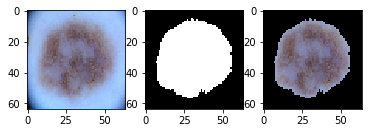

In [74]:
sample = resize(imread(melanoma + mel_names[100] + '.jpg'), (64, 64))
plt.subplot(1, 3, 1)
plt.imshow(sample)
plt.subplot(1, 3, 2)
plt.imshow(dataset_seg[100], cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(dataset_x[100])
plt.close

<function matplotlib.pyplot.close(fig=None)>

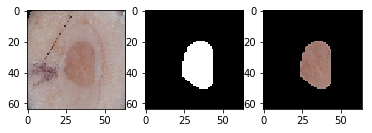

In [75]:
sample = resize(imread(others + oth_names[0] + '.jpg'), (64, 64))
plt.subplot(1, 3, 1)
plt.imshow(sample)
plt.subplot(1, 3, 2)
plt.imshow(dataset_seg[374], cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(dataset_x[374])
plt.close

In [48]:
#over sampling melanoma
mel_aug = []
datagen = ImageDataGenerator(rotation_range = 20)
for batch in datagen.flow(np.array(dataset_x[0:374])):
      mel_aug.extend(batch)

KeyboardInterrupt: 

In [78]:
len(dataset_x)

2000

In [50]:
dataset_x = dataset_x + mel_aug
dataset_y = dataset_y + [1 for x in range(len(mel_aug))]

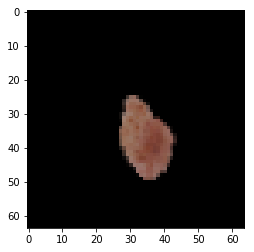

In [60]:
plt.imshow(dataset_x[2000])

In [77]:
#saving the dataset lists, convert to numpy array to save memory in colab

with open('X_clf', 'wb') as f:
    pickle.dump(np.array(dataset_x), f)
    
with open('Y_clf', 'wb') as f:
    pickle.dump(np.array(dataset_y), f)
    
with open('X_seg', 'wb') as f:
    pickle.dump(np.array(dataset_seg), f)